# On main branch, this file should be non executed and no parameters set.
# On dev_ branch, it must be fully executed and must include tests.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
#import sqlite3

## Parameters

In [3]:
# Set the filename of the database
# Example: 'bubble_filtering__8_neighbors_squared_network.db'


db_path = 'results_databases/bubble_filtering__8_neighbors_squared_network__MXU.csv'
v = 0.25

## Main
At the normal uses, the below code should not be changed.

In [ ]:
# Read the physical quantities database
full = pd.read_csv(db_path, index_col=0)

# Select the data corresponding to the given visibility v.
phys_quant = full[full.v == v]

# Get the number of sites
N = phys_quant.N.unique()

# Set the index to N and q
phys_quant.set_index(['N','q'], inplace=True)

print('N =', N)

### Magnetization

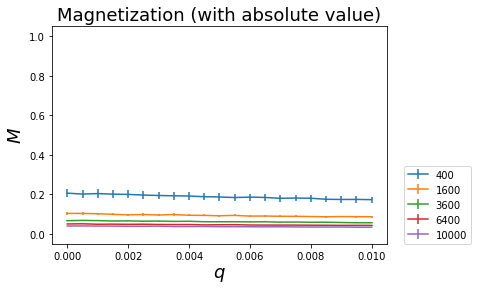

In [8]:
net_sizes = N[:]

for n in net_sizes:
    phys_quant.loc[n].M.plot(label='%d' % n, 
                             yerr=phys_quant.loc[n].M_err)
    
plt.xlabel('$q$', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Magnetization (with absolute value)', fontsize=18)
plt.legend(loc=(1.05,0))

#plt.xlim(0,0.051)
plt.ylim(-0.05,1.05)

plt.show()

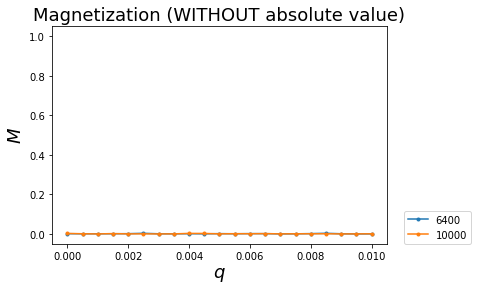

In [9]:
net_sizes = N[-2:]

for n in net_sizes:
    phys_quant.loc[n].M_noMod.abs().plot(label='%d' % n, marker='.')
    
plt.xlabel('$q$', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Magnetization (WITHOUT absolute value)', fontsize=18)
plt.legend(loc=(1.05,0))

#plt.xlim(0,0.051)
plt.ylim(-0.05,1.05)

plt.show()

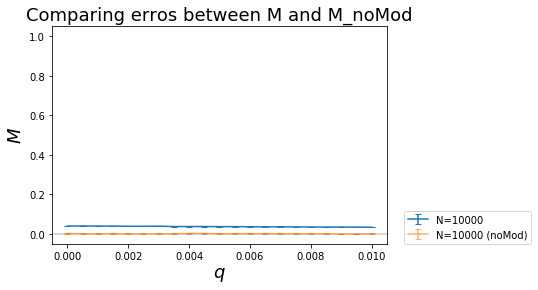

In [10]:
errorBar = True
net_sizes = [10000]
alpha = 0.6

for n in net_sizes:
    if errorBar:
        phys_quant.loc[n].M.plot(label='N=%d' % n, 
                yerr=phys_quant.loc[n].M_err, 
                capsize=3)
        phys_quant.loc[n].M_noMod.abs().plot(label='N=%d (noMod)' % n, 
                capsize=3, yerr=phys_quant.loc[n].M_noMod_err, 
                alpha=alpha)
    else:
        phys_quant.loc[n].M.plot(label='N=%d' % n)
        phys_quant.loc[n].M_noMod.abs().plot(
                    label='N=%d (noMod)' % n, alpha=alpha)
    
    
plt.xlabel('$q$', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Comparing erros between M and M_noMod', fontsize=18)
plt.legend(loc=(1.05,0))

plt.axhline(0,color='black',lw=0.3)

#plt.xlim(0,0.02)
plt.ylim(-0.05,1.05)

plt.show()

### Susceptibility

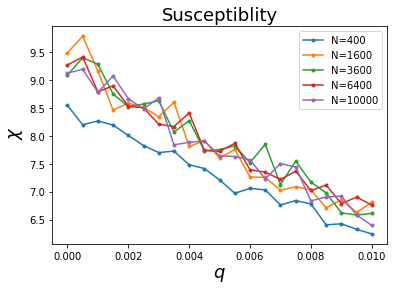

In [11]:
net_sizes = N[:]

for n in net_sizes:
    phys_quant.loc[n].X.plot(label='N=%d' % n, marker='.')

plt.xlabel('$q$', fontsize=18)
plt.ylabel(r'$\hspace{0.3}\chi$', fontsize=18) 
plt.title('Susceptiblity', fontsize=18)
plt.legend(loc='best')
#plt.xlim(0,0.005)
plt.show()

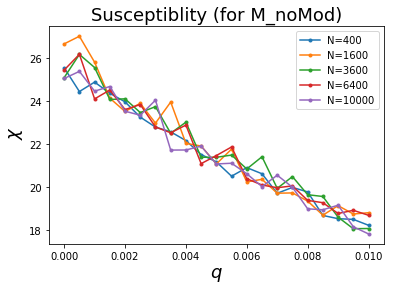

In [12]:
net_sizes = N[:]

for n in net_sizes:
    phys_quant.loc[n].X_noMod.plot(label='N=%d' % n, marker='.')

#plt.yscale('log') 
#plt.yscale('log')    
    
plt.xlabel('$q$', fontsize=18)
plt.ylabel(r'$\hspace{0.3}\chi$', fontsize=18) 
plt.title('Susceptiblity (for M_noMod)', fontsize=18)
plt.legend(loc='best')
#plt.xlim(0,0.02)
plt.show()

### Binder cumulant

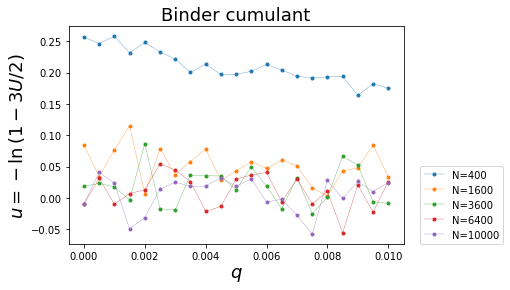

In [13]:
net_sizes = N[:]

for n in net_sizes:
    phys_quant.loc[n].u.plot(label='N=%d' % n, marker='.',lw=0.3)

plt.xlabel('$q$', fontsize=18)
plt.ylabel(r'$u = -\ln\hspace{0.2}(1-3U/2)$', fontsize=18) 
plt.title('Binder cumulant', fontsize=18)
plt.legend(loc=(1.05,0))
#plt.xlim(0.0,0.001)
#plt.ylim(1.8,)

plt.show()

### Scale test for the magnetization far from critical point

<br><br>
## Testing

In [14]:
# For plots I just do visual inspection as a matter of test.